In [51]:
from __future__ import print_function
from scipy.optimize import curve_fit, minimize
import matplotlib.pyplot as plt
import pylab as pl
import seaborn
import random
import numpy as np



%pylab inline


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [52]:
distributions = ['chisq','binom','norma', 'poi','geom']
mymean = 100


In [53]:
df = mymean

In [54]:
md = {}
md['chisq'] = np.random.chisquare(df,size = 100)

(array([  3.,   0.,   2.,   2.,   2.,   4.,   2.,   5.,   7.,   3.,   4.,
          3.,  13.,   4.,   7.,   6.,   6.,   7.,   1.,   2.,   2.,   1.,
          3.,   2.,   2.,   1.,   1.,   2.,   0.,   3.]),
 array([  72.72712626,   74.67607699,   76.62502772,   78.57397845,
          80.52292918,   82.47187991,   84.42083064,   86.36978137,
          88.3187321 ,   90.26768283,   92.21663356,   94.16558429,
          96.11453502,   98.06348575,  100.01243648,  101.96138721,
         103.91033794,  105.85928867,  107.8082394 ,  109.75719013,
         111.70614086,  113.65509159,  115.60404232,  117.55299305,
         119.50194378,  121.45089451,  123.39984524,  125.34879597,
         127.2977467 ,  129.24669743,  131.19564816]),
 <a list of 30 Patch objects>)

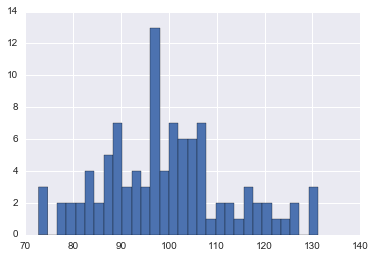

In [55]:
pl.hist(md['chisq'], bins = 30)


In [56]:
random.seed(999)
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


In [57]:
md['chisq'] = {}

In [58]:
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)

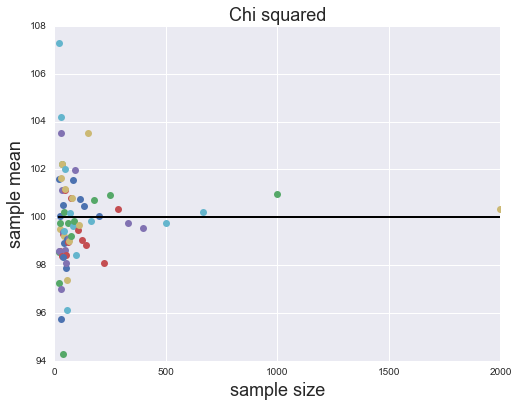

In [59]:
md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize = (8,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize = 18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize = 18)
        axchisq_mu_n.set_title('Chi squared', fontsize = 18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df,df], 'k')

In [15]:
allmeans = list(md['chisq']['means'].values())

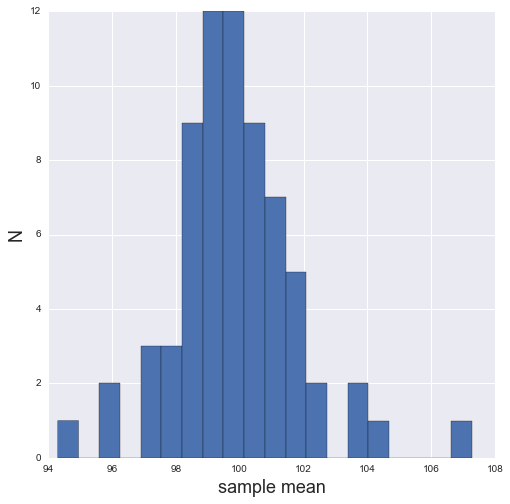

In [16]:
chiSample_n = pl.figure(figsize = (8,8)).add_subplot(111)
chiSample_n.hist(allmeans, bins = 20)

chiSample_n.set_xlabel('sample mean',fontsize = 18)
chiSample_n.set_ylabel('N', fontsize = 18)

(array([  1.,   3.,   0.,   4.,   5.,   6.,  10.,   6.,   5.,  12.,   5.,
         11.,   7.,   3.,   5.,   7.,   4.,   4.,   1.,   1.]),
 array([  97.84271774,   98.07273555,   98.30275336,   98.53277116,
          98.76278897,   98.99280678,   99.22282459,   99.4528424 ,
          99.68286021,   99.91287802,  100.14289582,  100.37291363,
         100.60293144,  100.83294925,  101.06296706,  101.29298487,
         101.52300268,  101.75302048,  101.98303829,  102.2130561 ,
         102.44307391]),
 <a list of 20 Patch objects>)

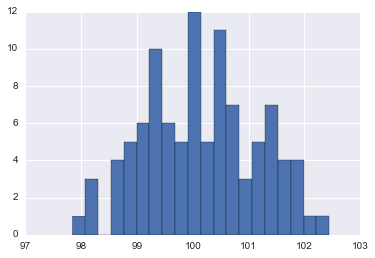

In [17]:
#Normal Distribution
md['norm']= np.random.normal(100,1,100)
plt.hist(md['norm'], bins = 20)


In [18]:
print ("Normal Distribution mean : %.2f, standard deviation : %.2f" % (md['norm'].mean(), md['norm'].std()))

Normal Distribution mean : 100.15, standard deviation : 1.01


In [19]:
mysize = (2000 / (np.array(range(1,100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


In [62]:
md['norm'] = {}

In [63]:
mean = 100
for n in mysize:
    md['norm'][n] = np.random.randn(n) + mean

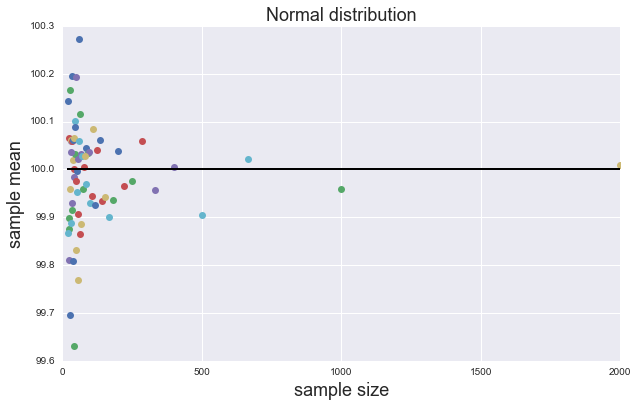

In [64]:
md['norm']['means'] = {}
normal_n = pl.figure(figsize = (10,6)).add_subplot(111)

for nn in md['norm']:
    if not type(nn) == str:
        md['norm']['means'][nn] = md['norm'][nn].mean()
        
        normal_n.plot(nn, md['norm']['means'][nn], 'o')
        normal_n.set_xlabel('sample size', fontsize = 18)
        normal_n.set_ylabel('sample mean', fontsize =18)
        normal_n.set_title('Normal distribution', fontsize = 18)
        normal_n.plot([min(mysize), max(mysize)], [100, 100], 'k')

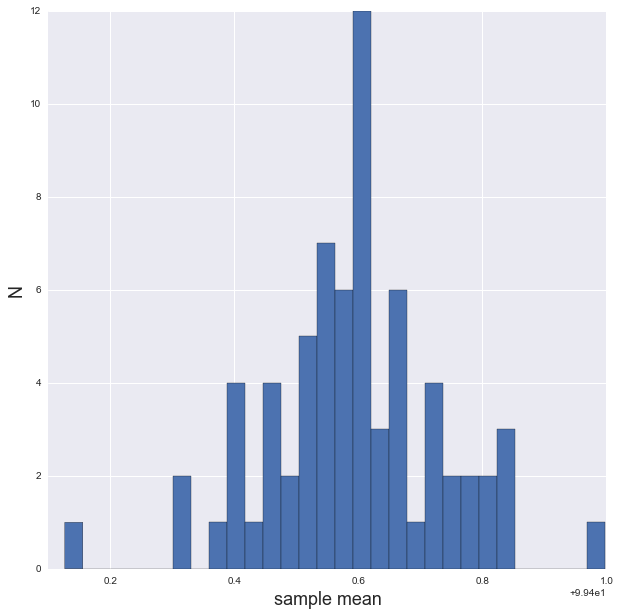

In [23]:
allmeans = list(md['norm']['means'].values())

normal_n = pl.figure(figsize = (10,10)).add_subplot(111)
normal_n.hist(allmeans, bins =30)
normal_n.set_xlabel('sample mean' ,fontsize =18)
normal_n.set_ylabel('N', fontsize = 18)

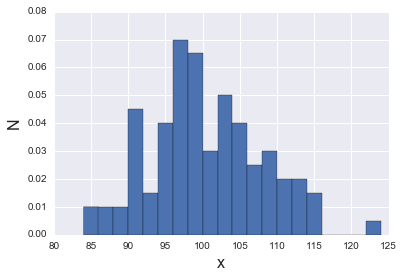

In [24]:
#Binomial Distribution

md['bi'] = np.random.binomial(200, 0.5, 100)


pl.hist(md['bi'], bins = 20, normed = True)
pl.ylabel('N', fontsize = 16)
pl.xlabel('x', fontsize = 16)

In [25]:
print ('Binomia mean : %.2f, standard deviation: %.2f' % (md['bi'].mean(), md['bi'].std()))

Binomia mean : 100.07, standard deviation: 7.59


In [73]:
md['bi'] = {}

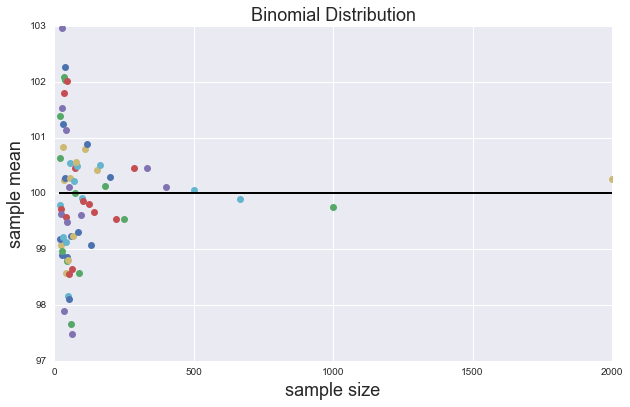

In [74]:
for n in mysize:
    md['bi'][n] = np.random.binomial(200,0.5,  size = n)

md['bi']['means'] = {}

axbio_n = pl.figure(figsize = (10,6)).add_subplot(111)
for nn in md['bi']:
    if not type(nn) == str:
        md['bi']['means'][nn] = md['bi'][nn].mean()
        axbio_n.plot(nn, md['bi']['means'][nn], 'o')
        axbio_n.set_xlabel('sample size', fontsize=18)
        axbio_n.set_ylabel('sample mean', fontsize=18)
        axbio_n.set_title('Binomial Distribution', fontsize=18)
        axbio_n.plot([min(mysize), max(mysize)], [100, 100], 'k')


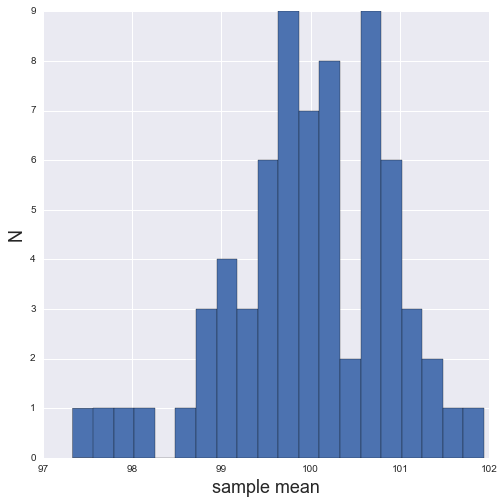

In [29]:
allmeans = list(md['bi']['means'].values())

pl.figure(figsize=(8,8))
pl.hist(allmeans, bins = 20)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

In [ ]:
#Poisson Distribution

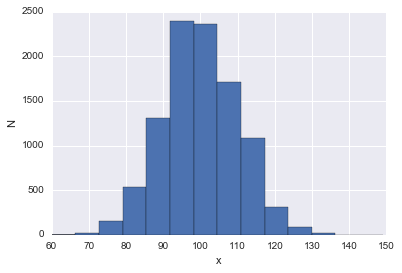

In [30]:
md = {}

md['poi'] = np.random.poisson(100, size=10000)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['poi'], bins = 14)
pl.ylabel('N')
pl.xlabel('x')

In [31]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['poi'].mean(), md['poi'].std()))

Poisson mean: 100.01, standard deviation: 10.06


In [68]:
md['poi'] = {}

In [69]:
for n in mysize:
    md['poi'][n] = np.random.poisson(100, size = n)


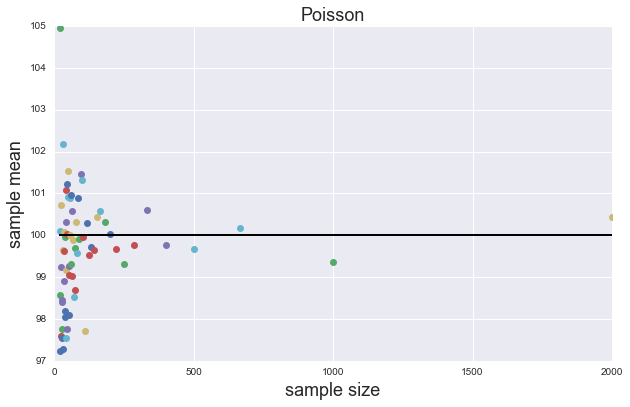

In [70]:
md['poi']['means'] = {}
axpoi_n = pl.figure(figsize = (10,6)).add_subplot(111)

for nn in md['poi']:
    if not type(nn) == str:
        md['poi']['means'][nn] = md['poi'][nn].mean()
        #and plot it
        axpoi_n.plot(nn, md['poi']['means'][nn], 'o')
        axpoi_n.set_xlabel('sample size', fontsize=18)
        axpoi_n.set_ylabel('sample mean', fontsize=18)
        axpoi_n.set_title('Poisson', fontsize=18)
        axpoi_n.plot([min(mysize), max(mysize)], [df, df], 'k')


In [ ]:
#Geometric Distribution

In [35]:
df = mymean

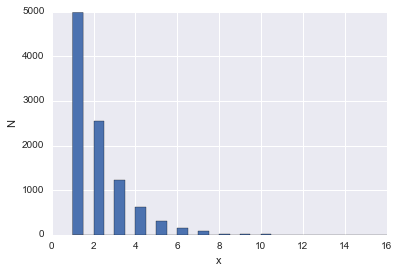

In [36]:
md = {}
# md is an empty disctionary
md['geom'] = np.random.geometric(0.5, size=10000)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['geom'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [37]:
print ("Geometric mean: %.2f, standard deviation: %.2f"%(md['geom'].mean(), md['geom'].std()))

Geometric mean: 2.00, standard deviation: 1.41


In [38]:
p = 1.0 / df

In [39]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


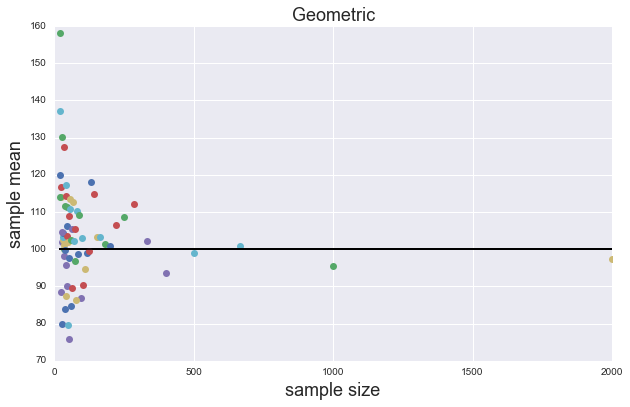

In [71]:
md['geom'] = {} 



for n in mysize:
    md['geom'][n] = np.random.geometric(0.01, size = n)
    
# save the means for plotting later    

md['geom']['means'] = {}
axgeo_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['geom']:
    if not type(nn) == str:
        md['geom']['means'][nn] = md['geom'][nn].mean()
        #and plot it
        axgeo_n.plot(nn, md['geom']['means'][nn], 'o')
        axgeo_n.set_xlabel('sample size', fontsize=18)
        axgeo_n.set_ylabel('sample mean', fontsize=18)
        axgeo_n.set_title('Geometric', fontsize=18)
        axgeo_n.plot([min(mysize), max(mysize)], [df, df], 'k')

In [49]:
allmeans=md['chisq']['means'].values()
a=pl.figure(figsize=(15, 6)).add_subplot(111)
a.hist(allmeans, bins=30,color='blue',label='chi square',alpha=0.5)  
a.set_xlabel('sample mean', fontsize = 18)
a.set_ylabel('N', fontsize = 18)
a.legend()


C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

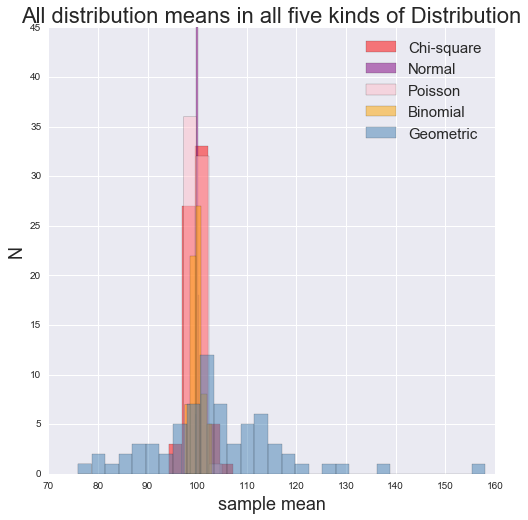

In [99]:
allmeans_1 = list(md['chisq']['means'].values())
allmeans_2 = list(md['norm']['means'].values())
allmeans_3 = list(md['poi']['means'].values())
allmeans_4 = list(md['bi']['means'].values())
allmeans_5 = list(md['geom']['means'].values())

pl.figure(figsize=(8, 8))

pl.hist(allmeans_1, bins=5, color = 'red', alpha = 0.5, label = "Chi-square")
pl.hist(allmeans_2, bins=3, color = 'purple', alpha = 0.5, label = "Normal")
pl.hist(allmeans_3, bins=3, color='pink', alpha = 0.5, label = "Poisson")
pl.hist(allmeans_4, bins=5, color='orange', alpha = 0.5, label = "Binomial")
pl.hist(allmeans_5, bins=30, color = 'steelBlue', alpha = 0.5, label = "Geometric")

pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend(fontsize=15)
pl.title("All distribution means in all five kinds of Distribution", fontsize = 22)
pl.show()